2025-11-01 14:23:35.675021: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-01 14:23:35.833107: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-01 14:23:38.743452: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/mohit/miniconda3/envs/dl/lib/python3.10/site-packages/keras/src/layers/convolutional/

Epoch 1/5


2025-11-01 14:23:44.976020: I external/local_xla/xla/service/service.cc:163] XLA service 0x78287400a460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-01 14:23:44.976059: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-11-01 14:23:45.003216: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-01 14:23:45.198380: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91301


  5/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.1490 - loss: 2.2637

I0000 00:00:1762007029.837490    3500 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8715 - loss: 0.4254

2025-11-01 14:23:56.957540: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_131', 20 bytes spill stores, 20 bytes spill loads



750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9453 - loss: 0.1816 - val_accuracy: 0.9833 - val_loss: 0.0575
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9837 - loss: 0.0531 - val_accuracy: 0.9863 - val_loss: 0.0455
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9888 - loss: 0.0365 - val_accuracy: 0.9879 - val_loss: 0.0391
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9901 - val_loss: 0.0353
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9895 - val_loss: 0.0386
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9898 - loss: 0.0310
Test Accuracy: 0.989799976348877


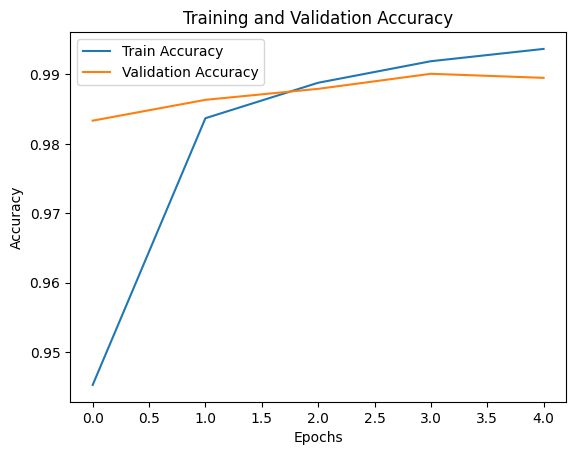

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


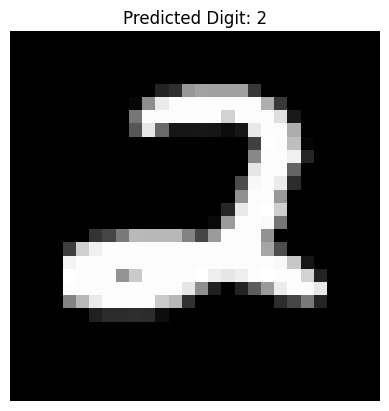

In [1]:
# Step a: Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step b: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape for CNN input (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step c: Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')   # 10 output classes (0–9)
])

# Step d: Compile and Train Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step e: Evaluate Model
loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)

# Step f: Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Step g: Predict a Random Image
idx = np.random.randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.reshape(28,28), cmap='gray')
plt.axis('off')

pred = np.argmax(model.predict(img.reshape(1,28,28,1)))
plt.title(f"Predicted Digit: {pred}")
plt.show()
